In [1]:
import logging
#Logging is a means of tracking events that happen when some software runs
# Create and configure logger
logging.basicConfig(filename="../logs/newfile.log",
                    format='%(asctime)s %(message)s',
                    filemode='w')
 
# Creating an object
logger = logging.getLogger()
 
# Setting the threshold of logger to DEBUG
logger.setLevel(logging.DEBUG)
 
# Test messages
logger.debug("Harmless debug Message")
logger.info("Just an information")
logger.warning("Its a Warning")
logger.error("Did you try to divide by zero")
logger.critical("Internet is down")

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import logging

sns.set_style("darkgrid")
%matplotlib inline
import sys
sys.path.insert(0,'../scripts/')


C:\Users\kachase\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:

from data_loader import load_df_from_csv
from data_struct import DataInfo
from cleaner import DataCleaner


In [4]:
missing_values = ["n/a", "na", "undefined",'']
train = load_df_from_csv("../data/train.csv",na_values=missing_values)
test = load_df_from_csv("../data/test.csv",na_values=missing_values)
store =load_df_from_csv ("../data/store.csv",na_values=missing_values)

C:\Users\kachase\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  


In [5]:
test.shape


(41088, 8)

In [6]:
train.shape

(1017209, 9)

In [7]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


##Features

Id - an Id that represents a (Store, Date) duple within the test set

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

StoreType - differentiates between 4 different store models: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [9]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# Convert the Tabular Data to Time Series Data

In [10]:
ID = test['Id']
test.drop('Id',inplace=True,axis=1)
#write modeule to drop id,We will ot require it as it lack i the trai set.

In [11]:
train.sort_values(["Store","Date"], ignore_index=True, inplace=True)
test.sort_values(["Store","Date"], ignore_index=True, inplace=True)
#module to sort values

In [12]:

for dataset in (train,test):
    dataset['Date'] = pd.to_datetime(dataset['Date'])
    dataset['Day'] = dataset.Date.dt.day
    dataset['Month'] = dataset.Date.dt.month
    dataset['Year'] = dataset.Date.dt.year
    dataset['DayOfYear'] = dataset.Date.dt.dayofyear
    dataset['WeekOfYear'] = dataset.Date.dt.weekofyear
    dataset.set_index('Date', inplace=True)
    

C:\Users\kachase\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [13]:
# adding new variable
train['SalePerCustomer'] = train['Sales']/train['Customers']
train['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

In [14]:
test.head()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,DayOfYear,WeekOfYear
Date,,,,,,,,,,,
2015-08-01,1,6,1.0,0,0,1,1,8,2015,213,31
2015-08-02,1,7,0.0,0,0,1,2,8,2015,214,31
2015-08-03,1,1,1.0,1,0,1,3,8,2015,215,32
2015-08-04,1,2,1.0,1,0,1,4,8,2015,216,32
2015-08-05,1,3,1.0,1,0,1,5,8,2015,217,32


In [15]:
test.tail()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,DayOfYear,WeekOfYear
Date,,,,,,,,,,,
2015-09-13,1115,7,0.0,0,0,0,13,9,2015,256,37
2015-09-14,1115,1,1.0,1,0,0,14,9,2015,257,38
2015-09-15,1115,2,1.0,1,0,0,15,9,2015,258,38
2015-09-16,1115,3,1.0,1,0,0,16,9,2015,259,38
2015-09-17,1115,4,1.0,1,0,0,17,9,2015,260,38


The test set has data till 17 Sep 2015 from August 1

In [16]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,DayOfYear,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,,
2013-01-01,1,2,0,0,0,0,a,1,1,1,2013,1,1,NaN
2013-01-02,1,3,5530,668,1,0,0,1,2,1,2013,2,1,8.278443
2013-01-03,1,4,4327,578,1,0,0,1,3,1,2013,3,1,7.486159
2013-01-04,1,5,4486,619,1,0,0,1,4,1,2013,4,1,7.247173
2013-01-05,1,6,4997,635,1,0,0,1,5,1,2013,5,1,7.869291


In [17]:
train.tail()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,DayOfYear,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,,
2015-07-27,1115,1,10712,608,1,1,0,1,27,7,2015,208,31,17.618421
2015-07-28,1115,2,8093,500,1,1,0,1,28,7,2015,209,31,16.186000
2015-07-29,1115,3,7661,473,1,1,0,1,29,7,2015,210,31,16.196617
2015-07-30,1115,4,8405,502,1,1,0,1,30,7,2015,211,31,16.743028
2015-07-31,1115,5,8680,538,1,1,0,1,31,7,2015,212,31,16.133829


This set has data from Jam 2013 to July of 2015

In [18]:
explorer = DataInfo(store)
#initialize module to get data overview

In [19]:
test_explorer = DataInfo(test)

In [20]:
train_explorer = DataInfo(train)

In [21]:
explorer.get_basic_description()

The DataFrame containes 1115 rows and 10 columns.
Current DataFrame Memory Usage:
213739
Current DataFrame Memory Usage of columns is :
DataFrame Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   uint16 
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float32
 4   CompetitionOpenSinceMonth  761 non-null    float32
 5   CompetitionOpenSinceYear   761 non-null    float32
 6   Promo2                     1115 non-null   uint8  
 7   Promo2SinceWeek            571 non-null    float32
 8   Promo2SinceYear            571 non-null    float32
 9   PromoInterval              571 non-null    object 
dtypes: float32(5), object(3), uint16(1), uint8(1)
memory usa

In [22]:
test_explorer.get_basic_description()

The DataFrame containes 41088 rows and 11 columns.
Current DataFrame Memory Usage:
4725120
Current DataFrame Memory Usage of columns is :
DataFrame Information: 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41088 entries, 2015-08-01 to 2015-09-17
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          41088 non-null  uint16 
 1   DayOfWeek      41088 non-null  uint8  
 2   Open           41077 non-null  float32
 3   Promo          41088 non-null  uint8  
 4   StateHoliday   41088 non-null  object 
 5   SchoolHoliday  41088 non-null  uint8  
 6   Day            41088 non-null  int64  
 7   Month          41088 non-null  int64  
 8   Year           41088 non-null  int64  
 9   DayOfYear      41088 non-null  int64  
 10  WeekOfYear     41088 non-null  int64  
dtypes: float32(1), int64(5), object(1), uint16(1), uint8(3)
memory usage: 2.5+ MB


In [23]:
train_explorer.get_basic_description()

The DataFrame containes 1017209 rows and 14 columns.
Current DataFrame Memory Usage:
122726044
Current DataFrame Memory Usage of columns is :
DataFrame Information: 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-07-31
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Store            1017209 non-null  uint16 
 1   DayOfWeek        1017209 non-null  uint8  
 2   Sales            1017209 non-null  uint16 
 3   Customers        1017209 non-null  uint16 
 4   Open             1017209 non-null  uint8  
 5   Promo            1017209 non-null  uint8  
 6   StateHoliday     1017209 non-null  object 
 7   SchoolHoliday    1017209 non-null  uint8  
 8   Day              1017209 non-null  int64  
 9   Month            1017209 non-null  int64  
 10  Year             1017209 non-null  int64  
 11  DayOfYear        1017209 non-null  int64  
 12  WeekOfYear       1017209 non-

In [24]:
explorer.get_missing_description()

The total number of missing values is 2343
21.01 % missing values.


In [25]:
test_explorer.get_missing_description()

The total number of missing values is 11
0.0 % missing values.


In [26]:
train_explorer.get_missing_description()

The total number of missing values is 172869
1.21 % missing values.


In [27]:
explorer.get_total_missing_values()

The total number of missing values is 2343
21.01 % missing values.


2343

In [28]:
explorer.get_columns_with_missing_values()

['CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [29]:
explorer.get_column_based_missing_values()

,missing_count,type
CompetitionDistance,3,float32
CompetitionOpenSinceMonth,354,float32
CompetitionOpenSinceYear,354,float32
Promo2SinceWeek,544,float32
Promo2SinceYear,544,float32
PromoInterval,544,object


In [30]:
explorer.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Store,0,0.0 %
StoreType,0,0.0 %
Assortment,0,0.0 %
CompetitionDistance,3,0.27 %
CompetitionOpenSinceMonth,354,31.75 %
CompetitionOpenSinceYear,354,31.75 %
Promo2,0,0.0 %
Promo2SinceWeek,544,48.79 %
Promo2SinceYear,544,48.79 %
PromoInterval,544,48.79 %


In [31]:
explorer.get_columns_missing_percentage_greater_than(10)

Index(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

# Further analysis of the train dataset

In [32]:
# closed stores
train[(train.Open == 0) & (train.Sales == 0)].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,DayOfYear,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,,
2013-01-01,1,2,0,0,0,0,a,1,1,1,2013,1,1,NaN
2013-01-06,1,7,0,0,0,0,0,1,6,1,2013,6,1,NaN
2013-01-13,1,7,0,0,0,0,0,0,13,1,2013,13,2,NaN
2013-01-20,1,7,0,0,0,0,0,0,20,1,2013,20,3,NaN
2013-01-27,1,7,0,0,0,0,0,0,27,1,2013,27,4,NaN


In [33]:
# closed stores
train[(train.Open == 0) & (train.Sales == 0)].shape

(172817, 14)

There're 172817 closed stores in the data. It is about 10% of the total amount of observations. To avoid any biased forecasts we will drop these values.

What about opened stores with zero sales?

In [34]:
# opened stores with zero sales
zero_sales = train[(train.Open != 0) & (train.Sales == 0)]
print("In total: ", zero_sales.shape)
zero_sales.head(5)

In total:  (54, 14)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,DayOfYear,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,,
2014-02-12,25,3,0,0,1,0,0,0,12,2,2014,43,7,NaN
2014-02-13,25,4,0,0,1,0,0,0,13,2,2014,44,7,NaN
2014-09-02,28,2,0,0,1,1,0,1,2,9,2014,245,36,NaN
2014-09-03,28,3,0,0,1,1,0,1,3,9,2014,246,36,NaN
2014-09-04,28,4,0,0,1,1,0,0,4,9,2014,247,36,NaN


Interestingly enough, there are opened store with no sales on working days. There're only 54 days in the data, so we can assume that there were external factors involved, for example repairs

In [35]:
zero_sales.Store.nunique()

41

In [36]:
print("Closed stores and days which didn't have any sales won't be counted into the forecasts.")
train = train[(train["Open"] != 0) & (train['Sales'] != 0)]
train = train.reset_index(drop=True) 

print("In total: ", train.shape)

Closed stores and days which didn't have any sales won't be counted into the forecasts.
In total:  (844338, 14)


# Outlier analysis in train dataset

In [37]:
train.Sales.describe() 

count    844338.000000
mean       6955.959134
std        3103.815515
min          46.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

{'Mean': 6955.959133664481, 'Median': 6369.0}

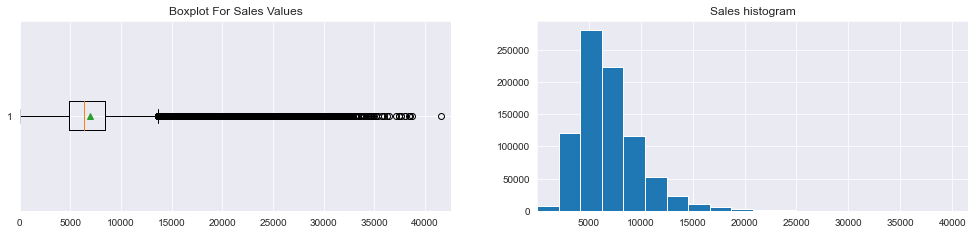

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(train.Sales, showmeans=True,vert=False)
axes[0].set_xlim(0,max(train["Sales"]+1000))
axes[0].set_title('Boxplot For Sales Values')
axes[1].hist(train.Sales, cumulative=False, bins=20)
axes[1].set_title("Sales histogram")
axes[1].set_xlim((min(train.Sales), max(train.Sales)))

{"Mean":np.mean(train.Sales),"Median":np.median(train.Sales)}

In [39]:
print ("{0:.2f}% of the time Rossman are actually having big sales day (considered outliers).".format(train[train.Sales>14000].count()[0]/train.shape[0]*100))
print ("{0:.2f}% of the time Rossman are actually having no sales at all.".format(train[train.Sales==0].count()[0]/train.shape[0]*100))

3.21% of the time Rossman are actually having big sales day (considered outliers).
0.00% of the time Rossman are actually having no sales at all.


In [40]:
df=train[train.Sales>14000]

In [41]:
df.shape

(27113, 14)

In [42]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,DayOfYear,WeekOfYear,SalePerCustomer
1855,3,1,14647,1282,1,1,0,0,16,12,2013,350,51,11.425117
1856,3,2,14555,1284,1,1,0,0,17,12,2013,351,51,11.335670
1861,3,1,14461,1579,1,0,0,1,23,12,2013,357,52,9.158328
2014,3,1,15689,1193,1,1,0,0,30,6,2014,181,27,13.150880
2417,4,4,16910,2096,1,1,0,1,28,3,2013,87,13,8.067748


Some exceptions (the outliers) in the boxplot had to be checked to see if it's wrong inputted data but it turns out this big amount of sales on certain days is explained by either promotional purposes,the type of the store being big and popular or just not having near enough competition and being the monopoly in its region. (Charts will come in the analysis section of the train and store dataset when merged).

Concerning the 0 of the time having 0 sales.it represented before removing them a tiny amount of the train set(0.01%), those values can affect further calculation of metrics and bias and are not to be taken into account. Those cases could happen for some shops, probably due to external events affecting it.( an incident, a manifestation etc.)

An important metric to always check when looking at a distribution is how the mean compares to the median and how close are they from each other. As we see here a mean of 6955 versus 6369 in median is a very good sign that there are no extravagant values affecting the general distribution of Sales.

In [43]:
train.Customers.describe()    

count    844338.000000
mean        762.777166
std         401.194153
min           8.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

{'Mean': 762.777166253325, 'Median': 676.0}

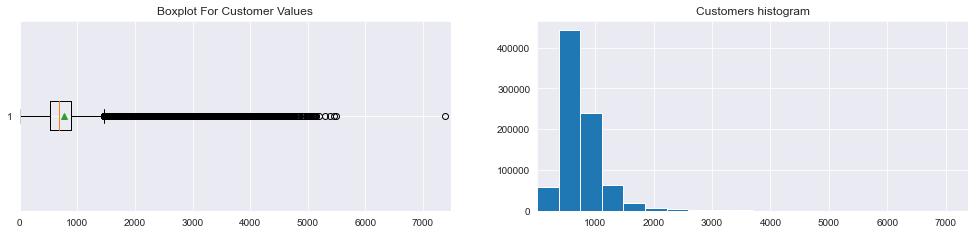

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(train.Customers, showmeans=True,vert=False)
axes[0].set_xlim(0,max(train["Customers"]+100))
axes[0].set_title('Boxplot For Customer Values')
axes[1].hist(train.Customers, cumulative=False, bins=20)
axes[1].set_title("Customers histogram")
axes[1].set_xlim((min(train.Customers), max(train.Customers)))

{"Mean":np.mean(train.Customers),"Median":np.median(train.Customers)}

In [45]:
print ("{0:.2f}% of the time Rossman are actually having customers more than usual (considered outliers).".format(train[train.Customers>1500].count()[0]/train.shape[0]*100))
print ("{0:.2f}% of the time Rossman are actually having no customers at all.".format(train[train.Customers==0].count()[0]/train.shape[0]*100))

4.37% of the time Rossman are actually having customers more than usual (considered outliers).
0.00% of the time Rossman are actually having no customers at all.


In [46]:
train[train.Customers>7000]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,DayOfYear,WeekOfYear,SalePerCustomer
617384,817,2,27190,7388,1,1,0,0,22,1,2013,22,4,3.680292


In [47]:
from scipy import stats
round(stats.pearsonr(train.Customers, train.Sales)[0],2)

0.82

We can see similair patterns with the customers column and the Sales column, in fact our pearson correlation factor of 0.82 explains that there is a strong positive correlation between Sales and Customers. In general, the more customers you have in a store, the higher your sales for the day.

We see that on a specific day there was a huge amount of customers in a store,this was due to a big promotion going on. Those specific values are affecting the mean which concludes the difference between a mean of 762 and a median of 676.

We observe a right skewness in both distributions because of the low number of outliers but the high representation of each outlier alone which pushes the distribution to the lefta as seen in both histograms.This typically occurs when the mean is higher than the median.

# Further analysis of the store dataset

In [48]:
explorer.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Store,0,0.0 %
StoreType,0,0.0 %
Assortment,0,0.0 %
CompetitionDistance,3,0.27 %
CompetitionOpenSinceMonth,354,31.75 %
CompetitionOpenSinceYear,354,31.75 %
Promo2,0,0.0 %
Promo2SinceWeek,544,48.79 %
Promo2SinceYear,544,48.79 %
PromoInterval,544,48.79 %


The Promo2SinceWeek,Promo2SinceYear and PromoInterval variables has 51% fill rate since they are actually NULL values because there are no continuous promotion for those stores.

Instead for CompetitionOpenSinceMonth and CompetitionOpenSinceYear, it's basically missing data that we're dealing with here (68.25% fill rate), this means that we have the nearest distance of the competitor but miss the date information on when did he actually opened next to the Rossman store.


## Competition Distance

For competition distance,there are three rows with missing values.Apperently this information is simply missing from the data. No particular pattern observed. In this case, it makes a complete sense to replace NaN with the median values (which is twice less that the average).

In [49]:
store[pd.isnull(store.CompetitionDistance)] 
#rows with missing values for Competition Distance, only 3 rows with null which makes sense since 99.73% is filled

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


{'Mean': 5404.901, 'Median': 2325.0, 'Standard Dev': 7659.7285}

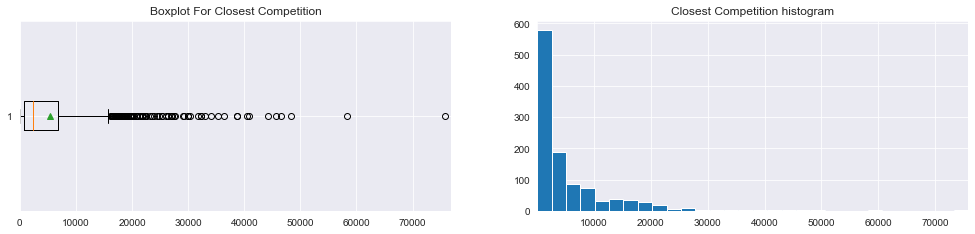

In [50]:
store_check_distribution=store.drop(store[pd.isnull(store.CompetitionDistance)].index)
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(store_check_distribution.CompetitionDistance, showmeans=True,vert=False,)
axes[0].set_xlim(0,max(store_check_distribution.CompetitionDistance+1000))
axes[0].set_title('Boxplot For Closest Competition')
axes[1].hist(store_check_distribution.CompetitionDistance, cumulative=False, bins=30)
axes[1].set_title("Closest Competition histogram")
axes[1].set_xlim((min(store_check_distribution.CompetitionDistance), max(store_check_distribution.CompetitionDistance)))
{"Mean":np.nanmean(store.CompetitionDistance),"Median":np.nanmedian(store.CompetitionDistance),"Standard Dev":np.nanstd(store.CompetitionDistance)}#That's what i thought, very different values, let's see why

We see a highly right skewed distribution for this variable with a significant difference between the mean and the median. This being caused by the amount of disperness in the data with a standard deviation of 7659, higher than the mean and the median.

Solution:

It is realistically better to input the median value to the three Nan stores then the mean since the mean is biased by those outliers.

In [51]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

## 2) CompetitionOpenSinceMonth and CompetitionOpenSinceYear?

Since we have no information whatsoever on those missing values and no accurate way of filling those values.
A creative way could be to apply a multilabel classification algorithm and train on the non Nan fields and then predict what could be most probably the month and year for those fields. But this approach is computationally too long.
So for this purpose those fields are going to be assigned to 0 .We can replace these values by zeros. The same goes for tha variables deducted from the competition, CompetitionOpenSinceMonth and CompetitionOpenSinceYear.

In [52]:
# replace NA's by 0
store.fillna(0, inplace = True)


In [53]:
explorer.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Store,0,0.0 %
StoreType,0,0.0 %
Assortment,0,0.0 %
CompetitionDistance,0,0.0 %
CompetitionOpenSinceMonth,0,0.0 %
CompetitionOpenSinceYear,0,0.0 %
Promo2,0,0.0 %
Promo2SinceWeek,0,0.0 %
Promo2SinceYear,0,0.0 %
PromoInterval,0,0.0 %


# Analysis for duplicates

In [54]:
explorer.get_duplicates()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [55]:
test_explorer.get_duplicates()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,DayOfYear,WeekOfYear
Date,,,,,,,,,,,


In [56]:
train_explorer.get_duplicates()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,DayOfYear,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,,


There are zero duplicates in all datasets

# Merging the datasets

In [57]:
# by specifying inner join we make sure that only those observations 
# that are present in both train and store sets are merged together
train_store = pd.merge(train, store, how = 'inner', on = 'Store')

print("In total: ", train_store.shape)
train_store.head()

In total:  (844338, 23)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,3,5530,668,1,0,0,1,2,1,...,8.278443,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,4327,578,1,0,0,1,3,1,...,7.486159,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,5,4486,619,1,0,0,1,4,1,...,7.247173,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,6,4997,635,1,0,0,1,5,1,...,7.869291,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,7176,785,1,1,0,1,7,1,...,9.141401,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [64]:
# by specifying inner join we make sure that only those observations 
# that are present in both train and store sets are merged together
test_store = pd.merge(test, store, how = 'inner', on = 'Store')

print("In total: ", test_store.shape)
test_store.head()

In total:  (41088, 20)


,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,DayOfYear,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,6,1.0,0,0,1,1,8,2015,213,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,7,0.0,0,0,1,2,8,2015,214,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,1,1.0,1,0,1,3,8,2015,215,32,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,1.0,1,0,1,4,8,2015,216,32,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,3,1.0,1,0,1,5,8,2015,217,32,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [65]:
cleaner = DataCleaner(train_store)

In [66]:
clean_train=cleaner.save_clean_data('../data/clean_train.csv')

In [68]:
cleaner = DataCleaner(test_store)

In [69]:
clean_train=cleaner.save_clean_data('../data/clean_test.csv')